# EXPLORATORY DATA ANALYSIS - RETAIL

**AUTHOR: ADITHI S**

BUSINESS PROBLEM

In [1]:
# We are given Superstore Data Set,where we need to perform Exploratory Data Analysis . 
# As a business manager, we need to find out the weak areas where we can work to make more profit.
# What all business problems we can derive by exploring the data?

In [2]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# LOADING/READING THE DATA

In [4]:
# importing csv file of data.

df = pd.read_csv('SampleSuperstore.csv')

In [5]:
# To  read Data where we will get top 5 rows.

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
# To check the structure of Dataset i.e the number of columns and rows. 

df.shape


(9994, 13)

In [7]:
# To check the data type and if there is any NULL values or so.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
# To check the columns of the Dataset

df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
# To check the unique values in the Dataset

df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**There isnt any Null values in the Dataset,We can now proceed for Statistical Analysis** .

In [10]:
# To check the aggregates of the Data Set 

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
# To find out  Sales and Profit generated by the Superstore

print('Sales:' ,df['Sales'].sum())
print('Profit:' ,df['Profit'].sum())

Sales: 2297200.8603000003
Profit: 286397.0217


In [12]:
# To check whether we have any duplicacy in  Dataset or not 

df.duplicated().sum()

17

In [13]:
# Since we have 17 duplicate rows we need to drop them for further Analysis

df = df.drop_duplicates()

In [14]:
# To check the total number of rows and columns after removing Duplicates

df.shape

(9977, 13)

# REGIONAL ANALYSIS

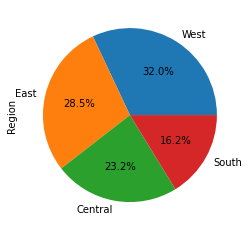

In [15]:
# To check maximum transactions made regionwise

df.Region.value_counts().plot.pie(autopct="%.1f%%")
plt.show()

**This Pie-Chart depicts that maximum transanctions were made in WEST region followed by EAST and then we have Central at last SOUTH is at bottom**

Next we will check the what amount sales and profits are being made by each region

<function matplotlib.pyplot.show(close=None, block=None)>

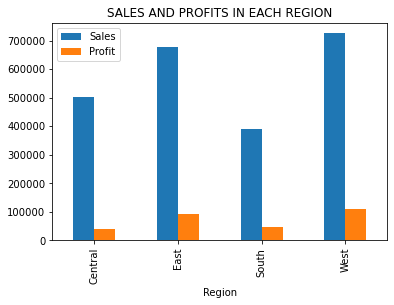

In [16]:
df.groupby('Region')['Sales','Profit'].sum().plot.bar()
plt.title('SALES AND PROFITS IN EACH REGION')
plt.legend()
plt.show

**Here Barplot shows that West Region has done maximum Sales and Profit is also highest in West Region followed by East Region,South Region is least performing Region**

# CUSTOMER ANALYSIS

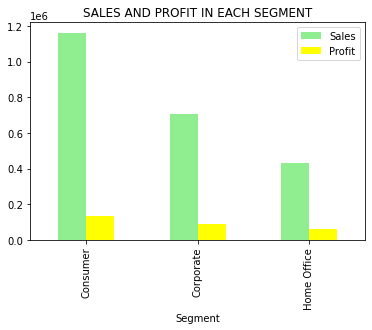

In [17]:
# To check maximum Sales and Profit in each segment

df.groupby('Segment')['Sales','Profit'].sum().plot.bar(color=['lightgreen','yellow'])
plt.title('SALES AND PROFIT IN EACH SEGMENT')
plt.legend()
plt.show()


**So the graph presents that Consumer segment is the one which has maximum buying capacity**
**Also they give maximum profit to Superstore whereas Home Office purchases less and add less profit to business**

Now we will check Ship Mode Segment wise

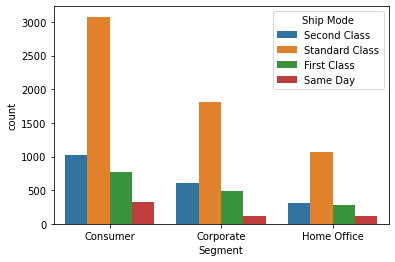

In [18]:
# To check this we will use countplot 

sns.countplot(x='Segment' , hue='Ship Mode' , data=df)
plt.show()

**In each segment most of the transaction has been shipped under Standard Class**

# PRODUCT ANALYSIS

In [19]:
# To check profit and sales Product wise

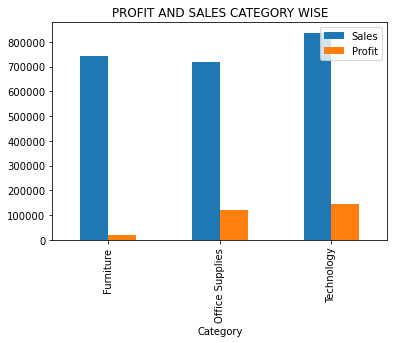

In [20]:
df.groupby('Category')['Sales','Profit'].sum().plot.bar()
plt.title('PROFIT AND SALES CATEGORY WISE')
plt.legend(loc = 1)
plt.show()

**This Bar Plot shows that Technology has given maximum sales subsequently Profit was also maximum.
But not following this trend Furniture also had sales at great amount following with least amount of profit.**

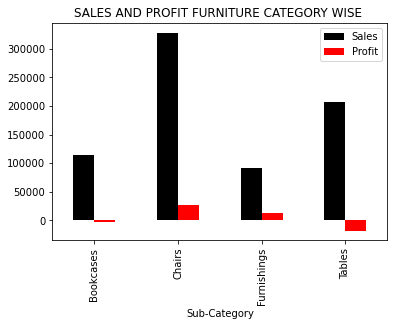

In [21]:
df[df['Category'] == 'Furniture'].groupby('Sub-Category')['Sales','Profit'].sum().plot.bar(color = ['black','red'])
plt.title('SALES AND PROFIT FURNITURE CATEGORY WISE ')
plt.legend(loc = 1)
plt.show()

**So we have sub categories of Furniture which are Bookcases,Chairs,Furnishings and Tables.
With this Bar Plot we can conclude that irrespective of high sales in Tables and Bookcases the store is incurring loss.
This loss is affecting the whole of Furniture Category**

Now we need to check irrespective of high sales why are we incurring loss?

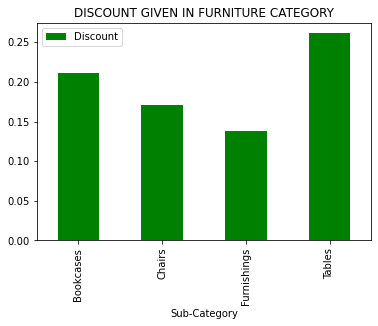

In [22]:
# To check the probable reason of loss 

df[df['Category'] == 'Furniture'].groupby('Sub-Category')['Discount'].mean().plot.bar(color =['green'])
plt.title('DISCOUNT GIVEN IN FURNITURE CATEGORY')
plt.legend(loc = 0)
plt.show()

**We concluded that despite of maximum Discount in Tables and Bookcases the store in incurring losses.**

Since we are having sales at max and Discount is also given,now we will check Correlation in between  the two. 

In [23]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


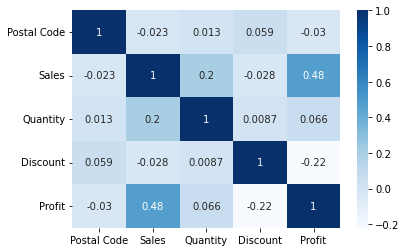

In [24]:
# To check the correlation in between Sales and Discount

sns.heatmap(df.corr(),annot=True , cmap= 'Blues')
plt.show()

**From above Heatmap we concluded there is a Negative correlation in between Profit and Discount whereas a Positive correlation between Profit and  Sales**

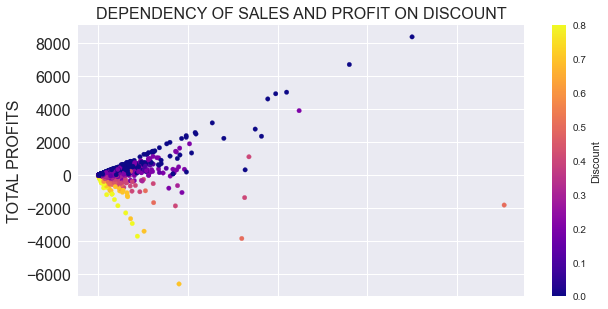

In [25]:
plt.style.use('seaborn')
df.plot(kind = 'scatter', figsize = (10,5) , x = 'Sales', y='Profit', c = 'Discount' , s = 20 , fontsize = 16 , colormap = 'plasma')
plt.ylabel('TOTAL PROFITS', fontsize = 16)
plt.title('DEPENDENCY OF SALES AND PROFIT ON DISCOUNT' , fontsize = 16)
plt.show()

**The above Scatterplot depicts that less the discount more is the Profits**
**Discount is effecting profit to a certain extent and after that point Profits has no relation with Discount**

# TOP PRODUCTS

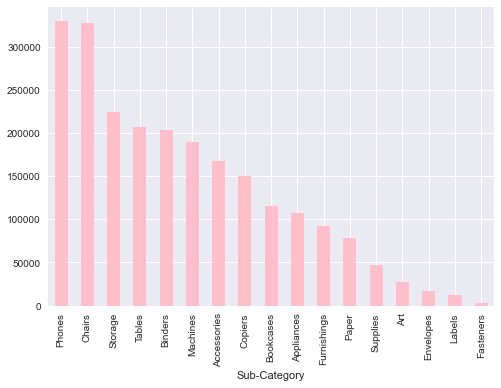

In [26]:
# Now we will check the Top Products Sold

df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color = 'pink')
plt.show()

**With this we concluded  that Phones,Chairs ,Storage,Tables and Binders are being sold at max consecutively.
Whereas Fasteners,Labels and Envelopes were sold  the least**

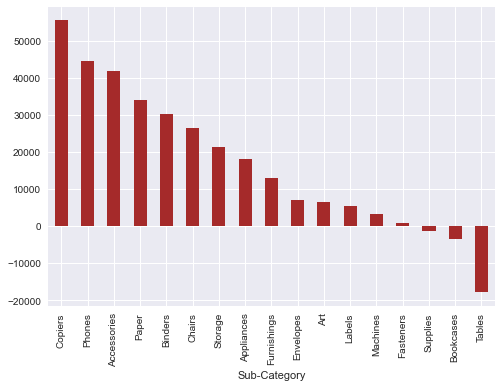

In [27]:
#To check the profit earned in all the  Sub-Categories

df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False).plot.bar(color = 'brown')
plt.show()

**Here we saw Copiers ,Phones,Accessories are top profit giving products to the store. 
whereas Store is incurring losses due to  Tables ,Bookcases and suppliers.**

# OBSERVATIONS:

* MAXIMUM TRANSACTIONS were made in WEST REGION
* MAXIMUM SALES in WEST REGION
* MAXIMUM PROFITS in WEST REGION
* MAXIMUM SALES AND PROFIT in CONSUMER SEGMENT
* MAXIMUM TRANSACTIONS  were shipped in STANDARD CLASS irrespective of  SEGMENT
* LEAST PROFIT is incurred in FURNITURE CATEGORY irrespective of good amount of Sales
* Under FURNITURE, TABLES and BOOKCASES are INCURRING LOSSES which is effecting the TOTAL PROFIT of Furniture Category
* HIGH DISCOUNT is being offered in TABLES and BOOKCASES which is somewhere the probable reason of losses.
* POSITIVE CORRELATION:Profit and Sales
* NEGATIVE CORRELATION:Profit and Discount
* LESS the DISCOUNT ,MORE the PROFIT and vice-versa

    

# CONCLUSION:

**From Above Observation we conclude that FURNITURE CATEGORY is the WEAK AREA where we need to work upon.**
**As in Furniture we have TABLES and BOOKCASES where due to HIGH DISCOUNT offered we are incurring  LOSSES.** 
**So we need to REDUCE the DISCOUNT in order to INCREASE the PROFIT.**